# Kernel PCA with Gaussian Kernel(RBF kernel) for different sigma values

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sys
import csv

#from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform
import sklearn.metrics.pairwise

filename = 'Dataset.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')

In [2]:
#Computes pairwise euclidean distance between the vectors
#Calculate euclidean distances of each pair of points in the data set
euclidean_distance = pdist(data, 'sqeuclidean')
distance_matrix= squareform(euclidean_distance)

Sigma is: 0.1


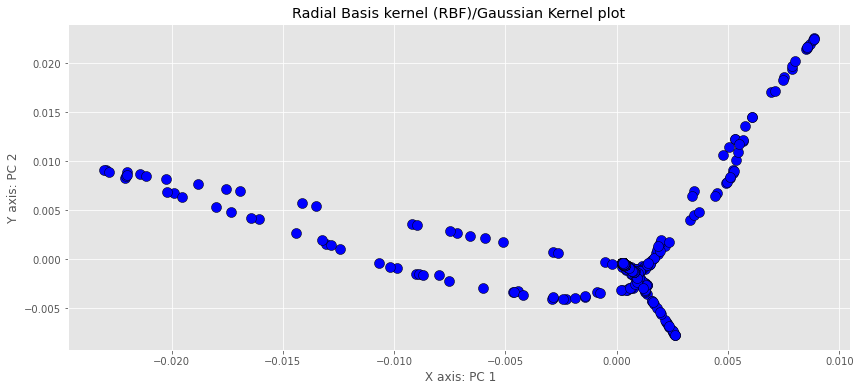

Sigma is: 0.2


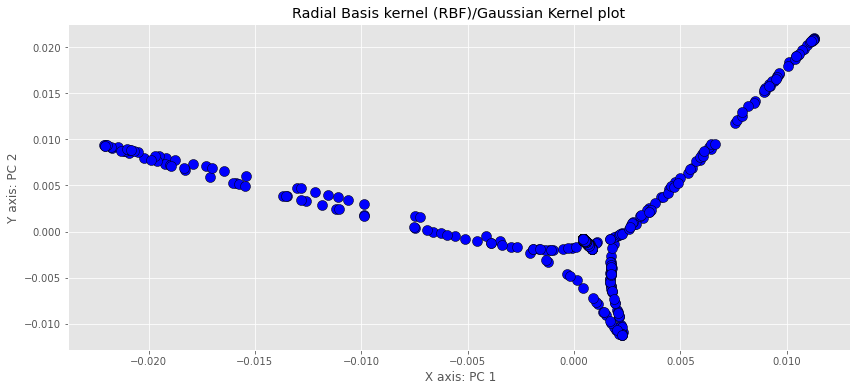

Sigma is: 0.3


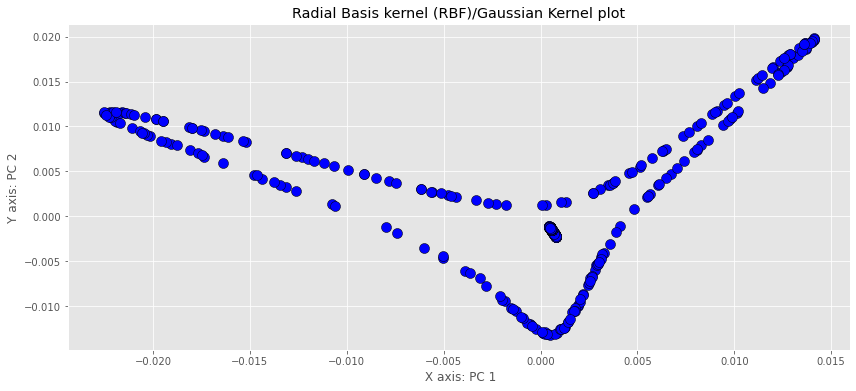

Sigma is: 0.4


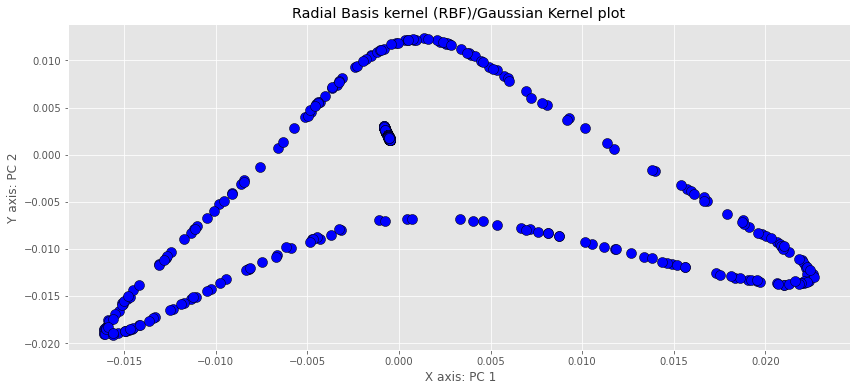

Sigma is: 0.5


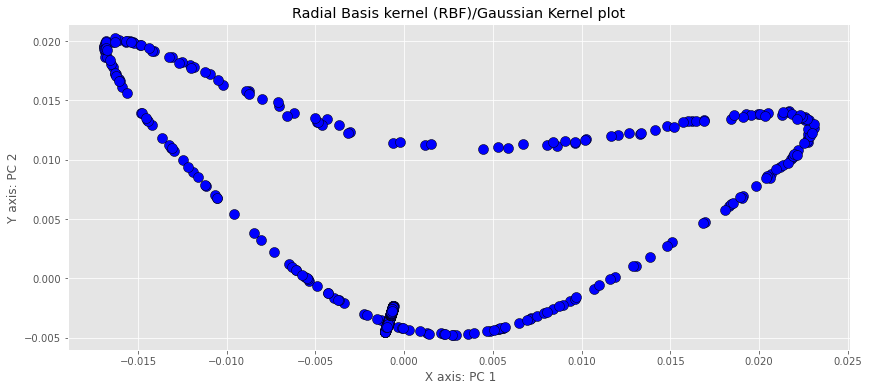

Sigma is: 0.6


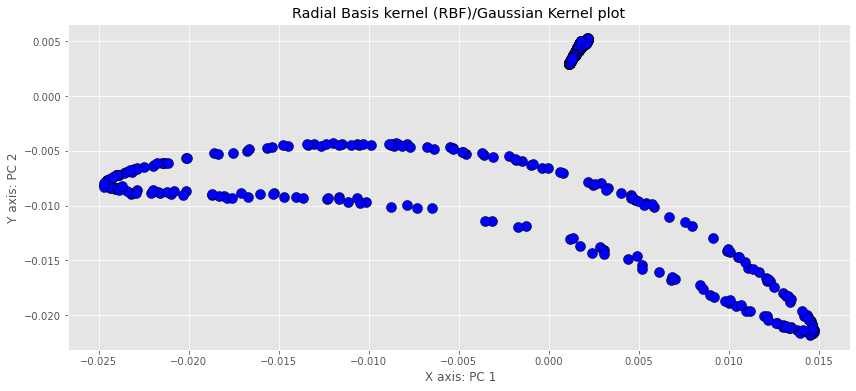

In [ ]:
sigma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for i in sigma:
    
    #When gamma value keeps on reducing (When sigma goes on increasing), the graph becomes more clear
    #Gamma is 1/(2*sigma^2)
    #Uncomment the below lines to run the libray function
    #gamma_val = 1 / (2 * i * i)
    #K = sklearn.metrics.pairwise.rbf_kernel(data, gamma = gamma_val)
    #Kernel Matrix K
    gamma = 1/(2*(i*i))
    gamma
    K = np.exp(-gamma * distance_matrix)

    #Centering the kernel matrix
    N = K.shape[0] # number of samples
    ones = np.ones((N,N)) / N
    K = K - ones @ K - K @ ones + ones @ K @ ones

    #Calculate eigenvalues and eigenvectors of kernel matrix
    n_components = 2
    eigenvals, eigenvecs = LA.eigh(K)
    eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
    # Collect the top k eigenvectors (projected examples)
    principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])

    #Normalization
    principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)

    #Project the data onto top 2 eigenvectors
    projected_data = np.dot(K , principal_components )
    
    with plt.style.context(('ggplot')):
        plt.figure(figsize=(14, 6))
        plt.scatter(projected_data[:,0], projected_data[:,1], s=100, facecolor = 'b', edgecolors='k')
        plt.xlabel(' X axis: PC 1')
        plt.ylabel('Y axis: PC 2')
        print('Sigma is:', i)
        plt.title("Radial Basis kernel (RBF)/Gaussian Kernel plot")
        plt.show()